In [1]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, peak_prominences, peak_widths
import sys

In [2]:
""" 
Pass Data in an argument when the file is run
    - This does not work in jupyter 
    - A test file shows this function
"""
# ltoutputch1 = str(sys.argv[1]) # sys.argv[0] is the python file
# ltoutputch4 = str(sys.argv[2])

# ch1data = pd.read_csv(ltoutputch1, sep="\t")
# ch4data = pd.read_csv(ltoutputch4, sep="\t")

# ch1data.columns =["Time", "V(compout)-CH1"]
# ch4data.columns =["Time", "V(compout)-CH4"]

' \nPass Data in an argument when the file is run\n    - This does not work in jupyter \n    - A test file shows this function\n'

In [3]:
""" Pull Data Manually """
ch1data = pd.read_csv("LtoutputFiles/output5ch1_05_03_2023.txt", sep="\t")
ch4data = pd.read_csv("LtoutputFiles/output5ch4_05_03_2023.txt", sep="\t")

ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

In [4]:
""" Formatting """

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Check for shorter file and truncate 

# print(f"len ch1: {len(ch1)}\nlen ch4: {len(ch4)}")
if len(ch1) < len(ch4): 
    ch1 = ch1.truncate(after=len(ch1)-1) # smallest less 1 bc `after` adds a value
    ch4 = ch4.truncate(after=len(ch1)-1)
else: 
    ch1 = ch1.truncate(after=len(ch4)-1)
    ch4 = ch4.truncate(after=len(ch4)-1)
# print(f"\nTruncation:\nlen ch1: {len(ch1)}\nlen ch4: {len(ch4)}")

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

Peak indices
ch1: [  76  391  749 1078 1412]
ch4: [ 148  481  802 1126 1434]


Text(0, 0.5, 'Voltage (V)')

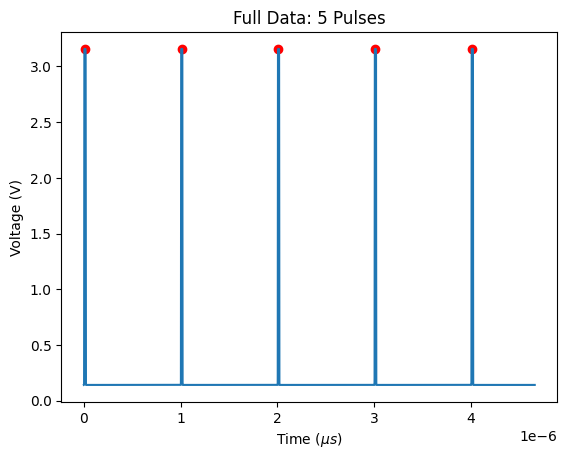

In [5]:
""" 
Find Rising edge (Full dataset): Testing block
    - Threshold voltage: 1.6V 
"""

# View all peaks 
peakindexCH1, _ = find_peaks(ch1V, height =1.6)
peakindexCH4, _ = find_peaks(ch4V, height= 1.6)
peaksCH1 = ch1V[peakindexCH1]
peaksCH4 = ch4V[peakindexCH4]

print(f'Peak indices\nch1: {peakindexCH1}\nch4: {peakindexCH4}')

plt.figure(0)
plt.plot(ch1t,ch1V) # nano
plt.scatter(ch1t[peakindexCH1],peaksCH1,  marker='o', color='red')
plt.title("Full Data: 5 Pulses")
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Voltage (V)")

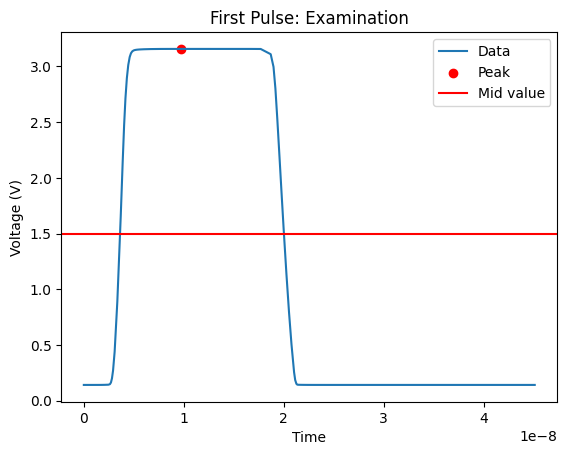

In [6]:
""" 
Find Rising edge (One Peak): Testing block
    - Threshold voltage: 1.6V 
"""

# View one peak
ch1peak = ch1.truncate(after=peakindexCH1[0]+50) # smallest less 1 bc `after` adds a value
ch4peak = ch4.truncate(after=peakindexCH4[0]+50)

# Naming and floats
ch1tpeak = ch1peak["Time"].to_numpy()
ch4tpeak = ch4peak["Time"].to_numpy()
ch1Vpeak = ch1peak["V(compout)-CH1"].to_numpy()
ch4Vpeak = ch4peak["V(compout)-CH4"].to_numpy()

plt.figure(1)
plt.plot(ch1tpeak,ch1Vpeak, label="Data")
plt.scatter(ch1t[peakindexCH1[0]],peaksCH1[0],  marker='o', color='red', label="Peak")
plt.title("First Pulse: Examination")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
# plt.axvline(x = 6e-9, color = 'b', label = 'axvline - full height')
plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')
plt.legend()

# of pulses: 1
Voltage List: [1.657259]
# of pulses: 1
Time List: [3.694726814220805e-09]


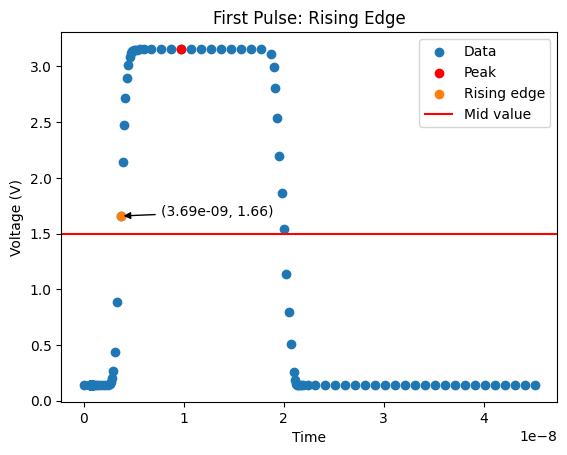

In [7]:
""" Slope checker: One Pulse """

# record 
trise = []
vrise = []
count = 0
eps = 0.45
Vmid = 1.5
pulses = 5

slope = np.diff(ch1Vpeak)/np.diff(ch1tpeak)

for (m,t,v) in zip(slope,ch1tpeak,ch1Vpeak): 
    if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
        if count <= pulses: 

            trise.append(t)
            vrise.append(v)
            count +=1
        else:
            count +=1
            print('Error, we are beyond the input pulse value.')
            print(f"Pulses: 5\nPulses found: {count}") 


print(f"# of pulses: {len(vrise)}\nVoltage List: {vrise}")
print(f"# of pulses: {len(trise)}\nTime List: {trise}")

plt.figure(1)
plt.scatter(ch1tpeak,ch1Vpeak, label="Data")
plt.scatter(ch1t[peakindexCH1[0]],peaksCH1[0],  marker='o', color='red', label="Peak")
plt.scatter(trise, vrise, label="Rising edge")

point = f"({trise[0]:2.2e}, {vrise[0]:.2f})"
plt.annotate(point, (trise[0],vrise[0]), xytext=(trise[0]+4e-9,vrise[0]), arrowprops={'arrowstyle': '-|>', 'color': 'black'})
plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')

plt.title("First Pulse: Rising Edge")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")

plt.legend()

# of pulses: 2
Voltage List: [1.114004, 1.956406]
# of pulses: 2
Time List: [2.0033211519684e-06, 2.003675949756475e-06]

Voltage diff of lower point to Mid value: 0.385996
Voltage diff of upper point to Mid value: 0.4564060000000001


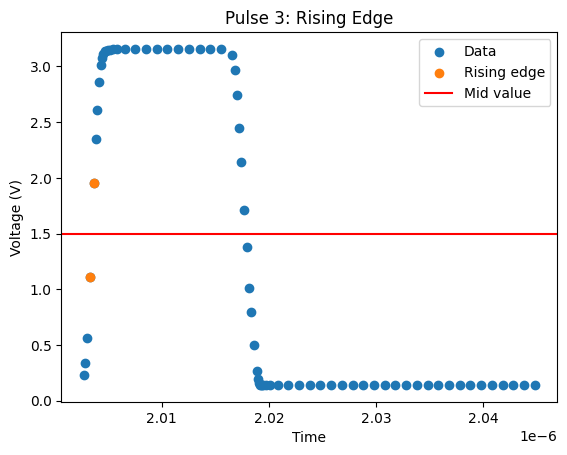

In [20]:
""" 
Rising edge issue: Missing points
- this block can also be used to examine individual peaks
"""

# Select Peak by changing the index: 
#       peakindexCH1[<peak>]
PulseExamined = 3
ch1peak = ch1.truncate(before=peakindexCH1[PulseExamined-1]-20 ,after=peakindexCH1[PulseExamined-1]+50) # smallest less 1 bc `after` adds a value

# Naming and floats
ch1tpeak = ch1peak["Time"].to_numpy()
ch1Vpeak = ch1peak["V(compout)-CH1"].to_numpy()

# Record rising edge values 
trise = []
vrise = []

# Constants
count = 0
eps = 0.5
Vmid = 1.5
pulses = 5

slope = np.diff(ch1Vpeak)/np.diff(ch1tpeak)

for (m,t,v) in zip(slope,ch1tpeak,ch1Vpeak):
    if count <= pulses: 
        if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
            trise.append(t)
            vrise.append(v)
            count +=1
    else:
        print('Error, we are beyond the input pulse value.')
        print(f"Pulses: {pulses}\nPulses found: {count}") 
        break


print(f"# of pulses: {len(vrise)}\nVoltage List: {vrise}")
print(f"# of pulses: {len(trise)}\nTime List: {trise}")

print(f"\nVoltage diff of lower point to Mid value: {Vmid-vrise[0]}")
print(f"Voltage diff of upper point to Mid value: {vrise[1]-Vmid}")

plt.figure(1)
plt.scatter(ch1tpeak,ch1Vpeak, label="Data")
plt.scatter(trise, vrise, label="Rising edge")

plt.axhline(y = Vmid, color = 'r', linestyle = '-', label='Mid value')

plt.title(f"Pulse {PulseExamined}: Rising Edge")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")

plt.legend()

# of pulses: 5
Voltage List: [1.657259, 1.035502, 1.114004, 1.589885, 1.334314]
# of pulses: 5
Time List: [3.694726814220805e-09, 1.003293775201765e-06, 2.0033211519684e-06, 3.003553160182265e-06, 4.003468349697794e-06]


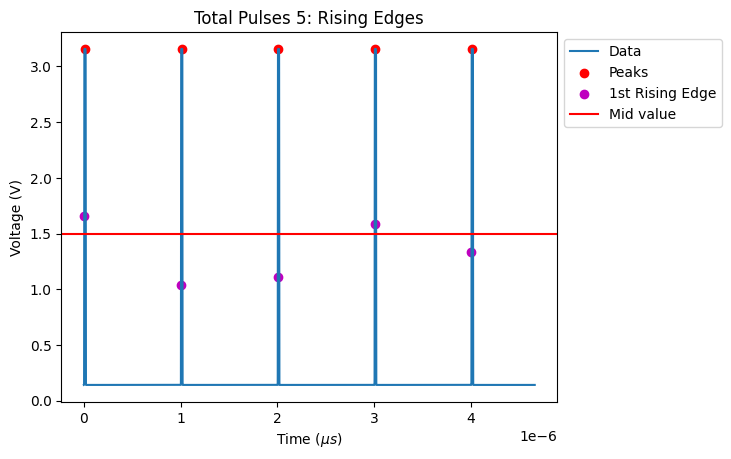

In [13]:
""" Slope checker: N Pulses """
# Input expected number of pulses 
pulses = 5

# record 
trise = []
vrise = []
count = 0
eps = 0.5
Vmid = 1.5


slope = np.diff(ch1V)/np.diff(ch1t)
lasthitT = -1

for (m,t,v) in zip(slope,ch1t,ch1V): 
    if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
        if ( lasthitT != -1 ) and (np.abs(t - lasthitT) < 4e-9 ):
            continue  
        if count <= pulses: 
            lasthitT = t
            trise.append(t)
            vrise.append(v)
            count +=1
        else:
            count +=1
            print('Error, we are beyond the input pulse value.')
            print(f"Pulses: 5\nPulses found: {count}") 


print(f"# of pulses: {len(vrise)}\nVoltage List: {vrise}")
print(f"# of pulses: {len(trise)}\nTime List: {trise}")

plt.figure(1)
plt.title("Fig 2")
plt.plot(ch1t,ch1V, label="Data")
plt.scatter(ch1t[peakindexCH1[:]],peaksCH1[:],  marker='o', color='red', label ='Peaks')
plt.scatter(trise, vrise, marker='o', color='m', label="1st Rising Edge")
plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')


plt.title(f"Total Pulses {pulses}: Rising Edges")
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Voltage (V)")

plt.legend(bbox_to_anchor=(1,1))

# of pulses: 6
Voltage List: [1.657259, 1.035502, 1.114004, 1.956406, 1.589885, 1.334314]
# of pulses: 6
Time List: [3.694726814220805e-09, 1.003293775201765e-06, 2.0033211519684e-06, 2.003675949756475e-06, 3.003553160182265e-06, 4.003468349697794e-06]


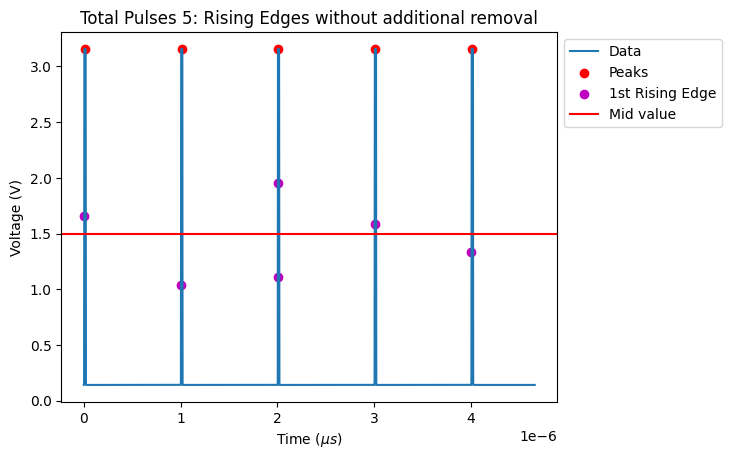

In [18]:
"""
Slope checker: N Pulses 
- without removing extra points
"""
# Input expected number of pulses 
pulses = 5

# record 
trise = []
vrise = []
count = 0
eps = 0.5
Vmid = 1.5


slope = np.diff(ch1V)/np.diff(ch1t)
# lasthitT = -1

for (m,t,v) in zip(slope,ch1t,ch1V): 
    if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
        # if ( lasthitT != -1 ) and (np.abs(t - lasthitT) < 4e-9 ):
        #     continue  
        if count <= pulses: 
            # lasthitT = t
            trise.append(t)
            vrise.append(v)
            count +=1
        else:
            count +=1
            print('Error, we are beyond the input pulse value.')
            print(f"Pulses: 5\nPulses found: {count}") 


print(f"# of pulses: {len(vrise)}\nVoltage List: {vrise}")
print(f"# of pulses: {len(trise)}\nTime List: {trise}")

plt.figure(1)
plt.title("Fig 2")
plt.plot(ch1t,ch1V, label="Data")
plt.scatter(ch1t[peakindexCH1[:]],peaksCH1[:],  marker='o', color='red', label ='Peaks')
plt.scatter(trise, vrise, marker='o', color='m', label="1st Rising Edge")
plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')


plt.title(f"Total Pulses {pulses}: Rising Edges without additional removal")
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Voltage (V)")

plt.legend(bbox_to_anchor=(1,1))

In [10]:
"""
Run both Channels and Plot TOF 
- this is loosly created and should not be used in .py file 
"""

def riseTime(cht, chv, num_pulse,eps=0.5,Vmid=1.5): 
    # record 
    trise = []
    vrise = []
    count = 0
    # eps = 0.5
    # Vmid = 1.5


    slope = np.diff(chv)/np.diff(cht)
    lasthitT = -1

    for (m,t,v) in zip(slope,cht,chv): 
        if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
            if ( lasthitT != -1 ) and (np.abs(t - lasthitT) < 4e-9 ):
                continue  
            if count <= pulses: 
                lasthitT = t
                trise.append(t)
                vrise.append(v)
                count +=1
            else:
                count +=1
                print('Error, we are beyond the input pulse value.')
                print(f"Pulses: 5\nPulses found: {count}") 


    # print(f"# of pulses: {len(vrise)}\nVoltage List: {vrise}")
    # print(f"# of pulses: {len(trise)}\nTime List: {trise}")

    return np.array(trise)

# Pull Data
def pullData(ch1data,ch4data):
    # Create data frame 
    ch1 = pd.DataFrame(ch1data)
    ch4 = pd.DataFrame(ch4data)

    # Check for shorter file and truncate 

    # print(f"len ch1: {len(ch1)}\nlen ch4: {len(ch4)}")
    if len(ch1) < len(ch4): 
        ch1 = ch1.truncate(after=len(ch1)-1) # smallest less 1 bc `after` adds a value
        ch4 = ch4.truncate(after=len(ch1)-1)
    else: 
        ch1 = ch1.truncate(after=len(ch4)-1)
        ch4 = ch4.truncate(after=len(ch4)-1)
    # print(f"\nTruncation:\nlen ch1: {len(ch1)}\nlen ch4: {len(ch4)}")

    # Naming and floats
    ch1t = ch1["Time"].to_numpy()
    ch4t = ch4["Time"].to_numpy()
    ch1V = ch1["V(compout)-CH1"].to_numpy()
    ch4V = ch4["V(compout)-CH4"].to_numpy()

    return ch1t, ch4t, ch1V, ch4V




(array([1., 0., 1., 1., 2.]),
 array([1.77326596e-09, 1.99001064e-09, 2.20675532e-09, 2.42350001e-09,
        2.64024469e-09, 2.85698937e-09]),
 <BarContainer object of 5 artists>)

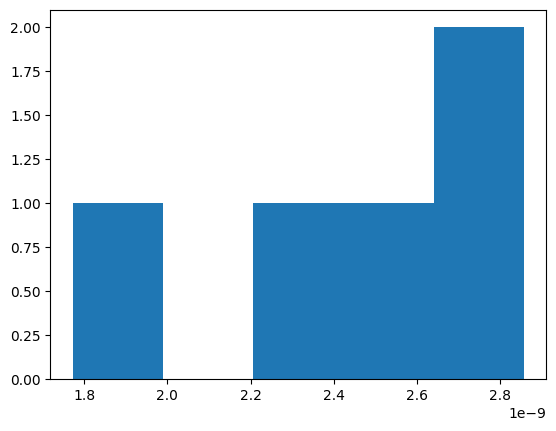

In [11]:
ch1t, ch4t, ch1V, ch4V = pullData(ch1data,ch4data)
tch1 = riseTime(ch1t,ch1V,5)
tch4 = riseTime(ch4t,ch4V,5)

ToF = tch4 - tch1

plt.hist(ToF, bins=5)